In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('CardioGoodFitness.csv')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [8]:
products = df['Product'].unique()
products

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [9]:
categoricalObject = df.select_dtypes(include=["object"]).columns
for attribute in categoricalObject:
    #print(attribute)
    df[attribute] = pd.Categorical(df[attribute])
#df['Product'] = pd.Categorical(df['Product'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


In [11]:
for attribute in categoricalObject:
    print(df[attribute].unique())

['TM195', 'TM498', 'TM798']
Categories (3, object): ['TM195', 'TM498', 'TM798']
['Male', 'Female']
Categories (2, object): ['Female', 'Male']
['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']


* There are total 3 products 'TM195', 'TM498', 'TM798'
* Minimum age is 18 and max age is 50
* Single and Married both type of people use machines
* Male and Female both use machine

In [12]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

* No missing values

In [13]:
def histogram_boxplot(data, feature, figsize=(12,7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    fig, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex= True, gridspec_kw={"height_ratios":(0.25,0.75)}, figsize=figsize)
    sns.boxplot(data=data, x= feature, ax= ax_box, showmeans=True)
    sns.histplot(data=data, x=feature, ax=ax_hist, bins=bins, kde=kde) if bins else sns.histplot(data=data, x=feature, ax=ax_hist)
    ax_hist.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist.axvline(data[feature].median(), color="black", linestyle="-")

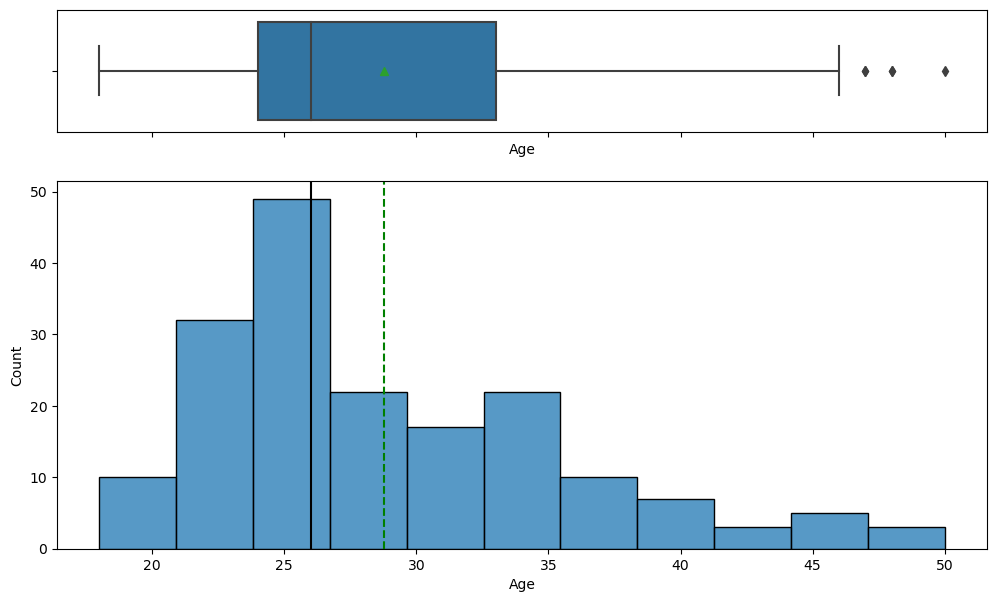

In [14]:
histogram_boxplot(df, 'Age')

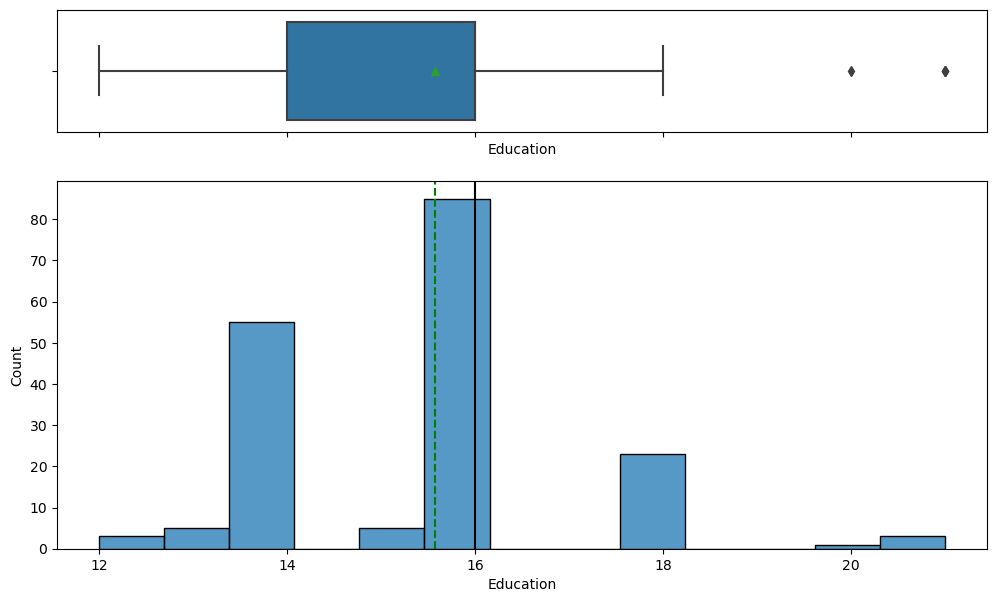

In [15]:
histogram_boxplot(df,'Education')

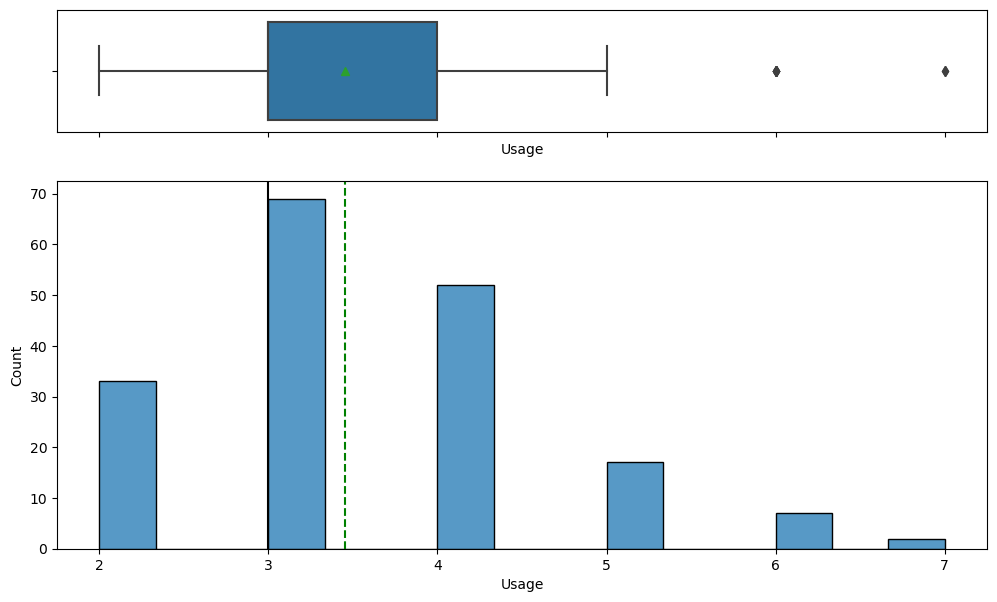

In [16]:
histogram_boxplot(df,'Usage')

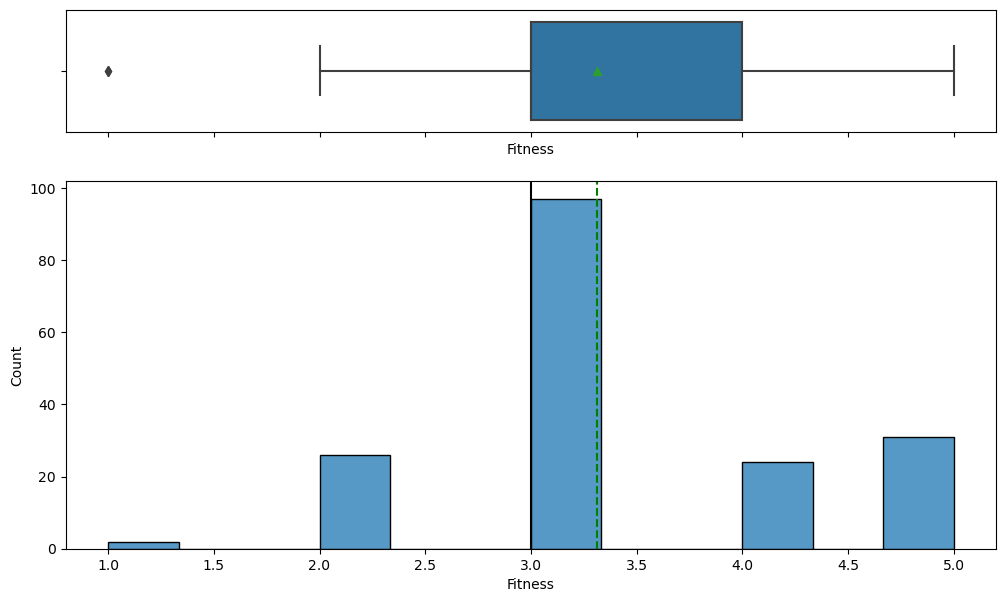

In [17]:
histogram_boxplot(df, 'Fitness')

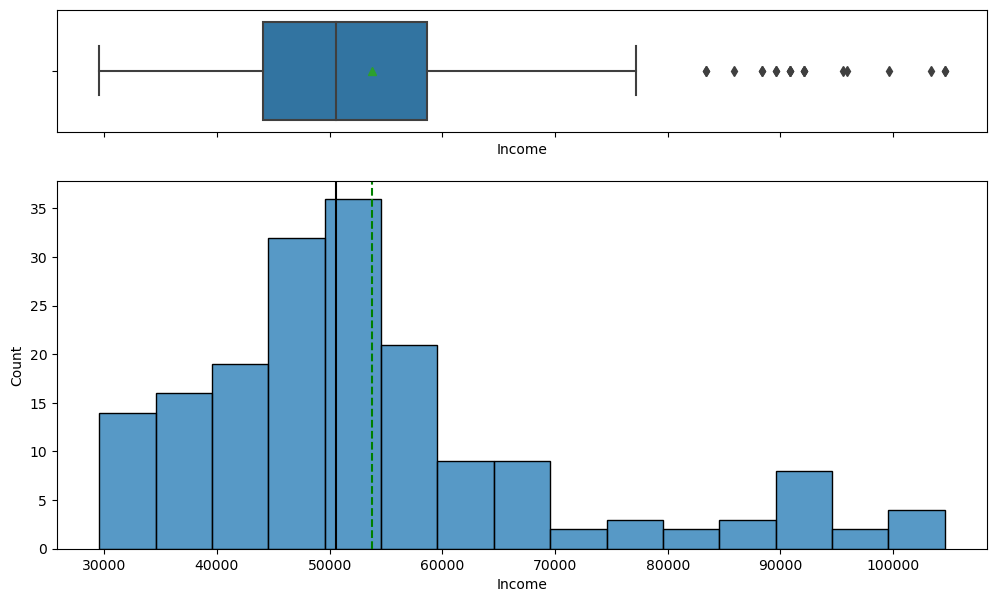

In [18]:
histogram_boxplot(df, 'Income')

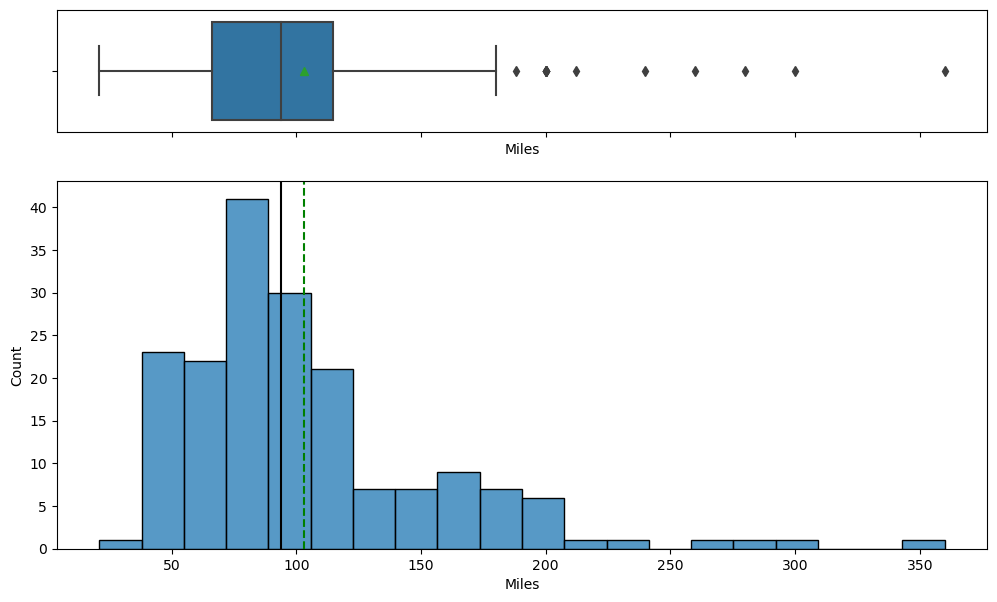

In [19]:
histogram_boxplot(df, 'Miles')

In [20]:
def labaled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+1, 5))
    else:
        plt.figure(figsize=(n+1, 5))
        
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x= feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())
  
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

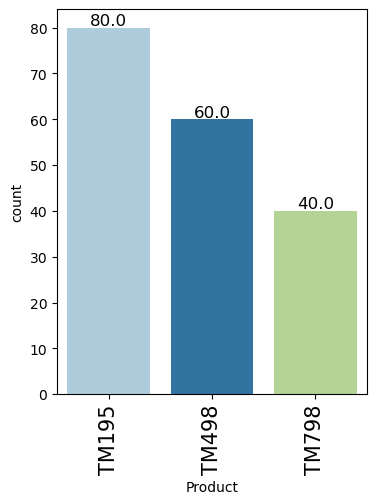

In [21]:
labaled_barplot(df,'Product')

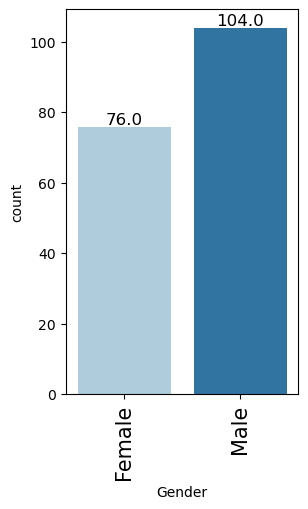

In [22]:
labaled_barplot(df,'Gender')

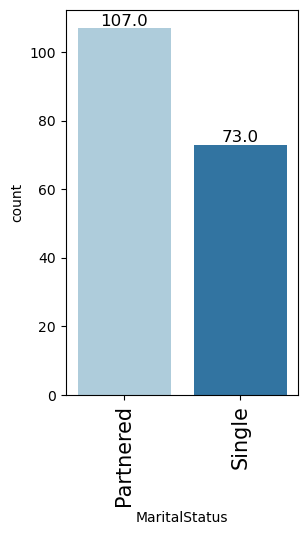

In [23]:
labaled_barplot(df,'MaritalStatus')

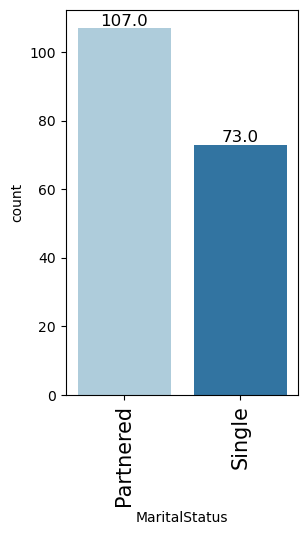

In [24]:
labaled_barplot(df,'MaritalStatus')

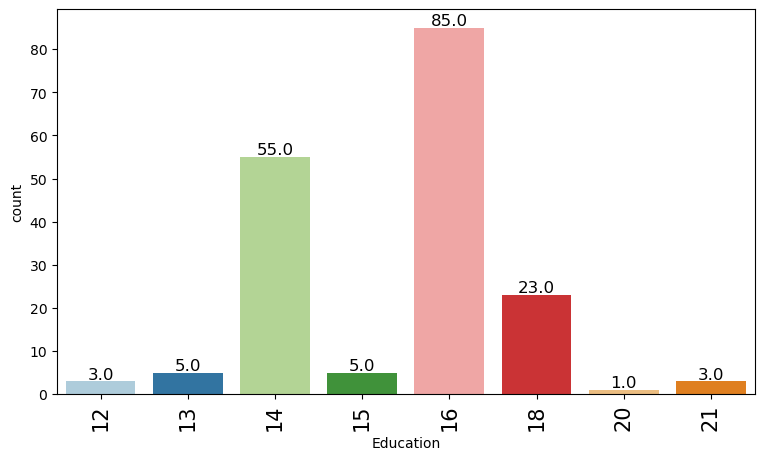

In [25]:
labaled_barplot(df, 'Education')

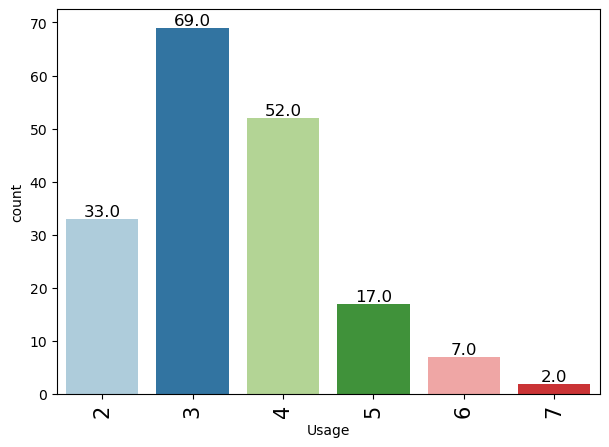

In [26]:
labaled_barplot(df, 'Usage')

/tmp/ipykernel_5800/580868014.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="Spectral")


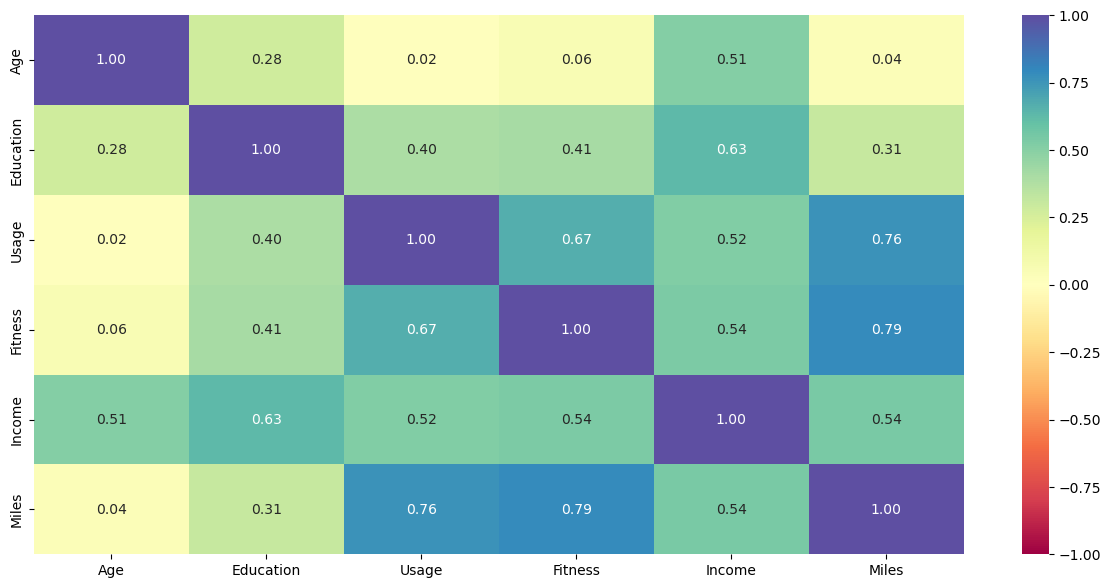

In [28]:
# Bivariate Analysis

plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", cmap="Spectral")
plt.show()

In [29]:
df.corr()

/tmp/ipykernel_5800/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


* Miles and Usage have high correlation
* Fitness and Usage also have high correlation
* Fitness and Miles have high correlation


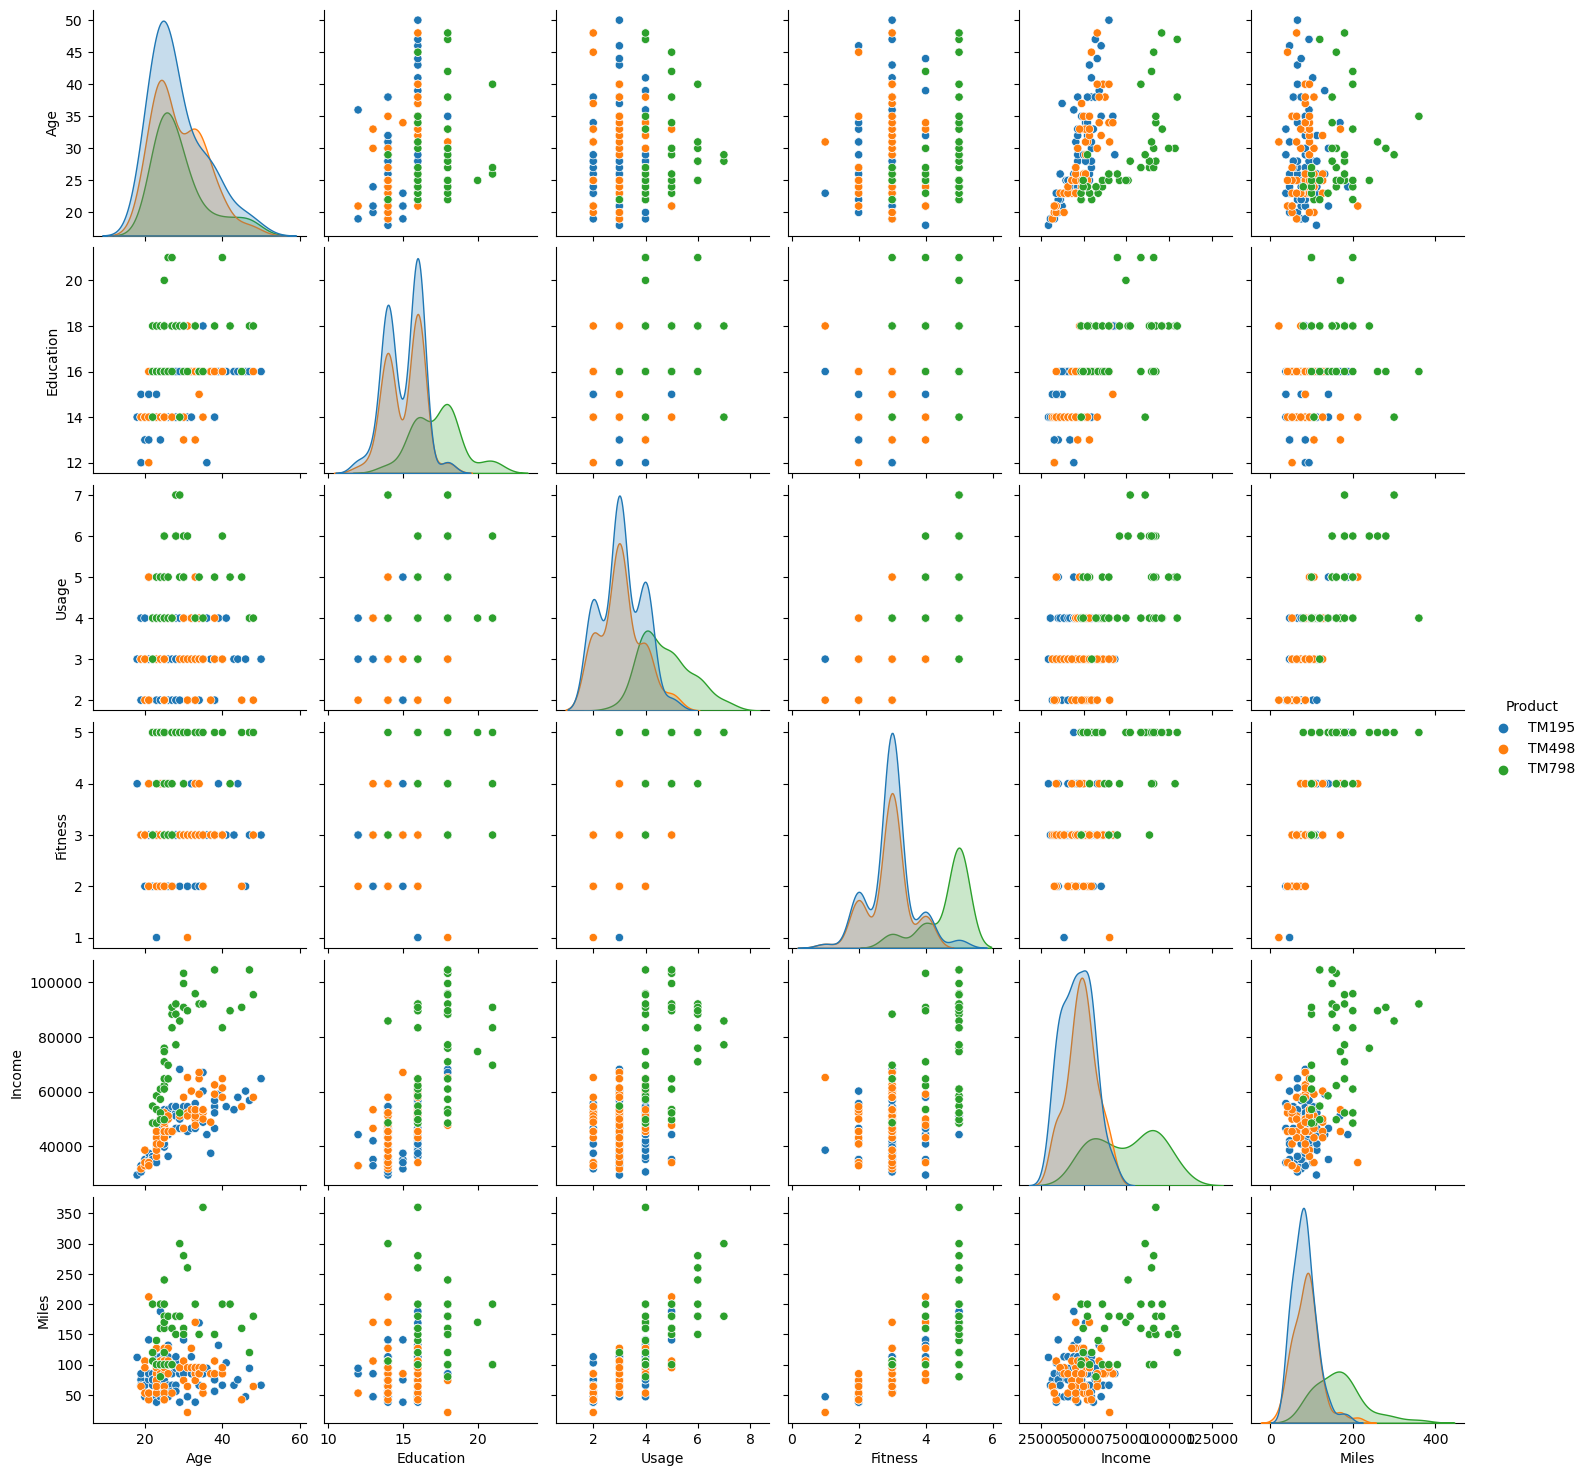

In [31]:
sns.pairplot(data=df, hue ='Product', diag_kind="kde")
plt.show()

# Product vs Age

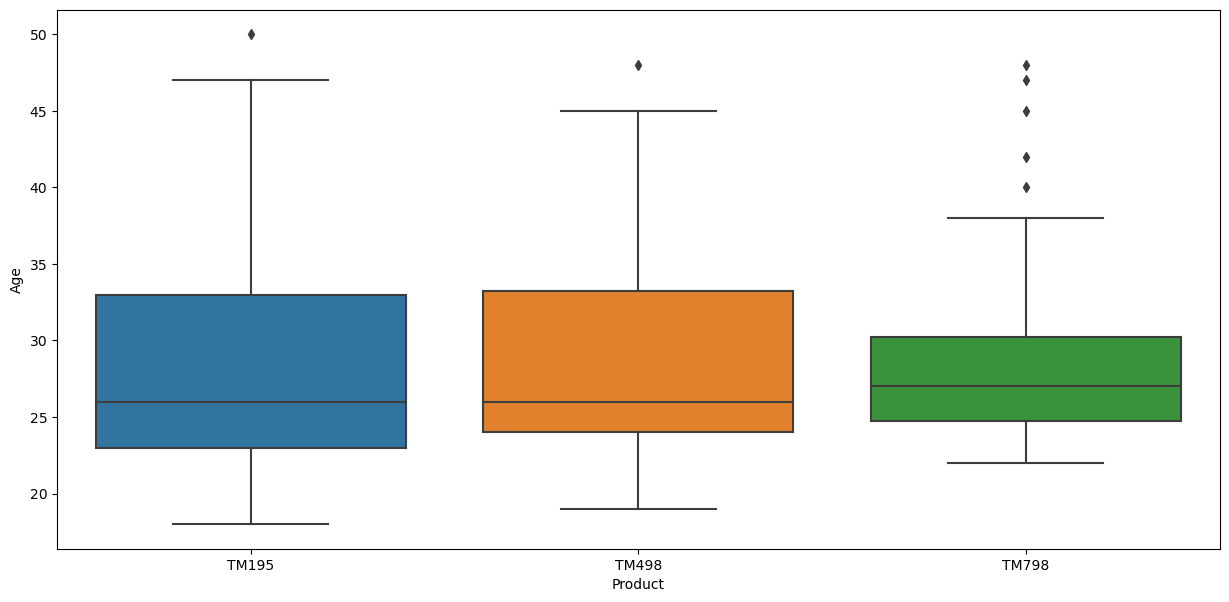

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='Product', y='Age');

# Product vs Education

<AxesSubplot: xlabel='Product', ylabel='Education'>

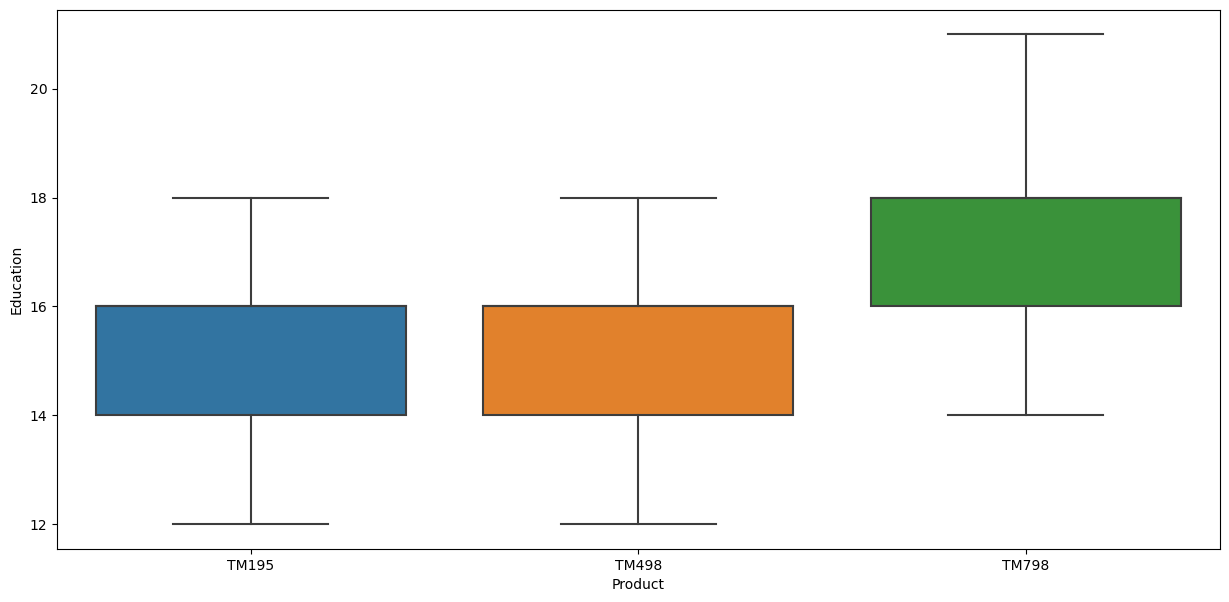

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='Product', y = 'Education')

# Product vs Usage

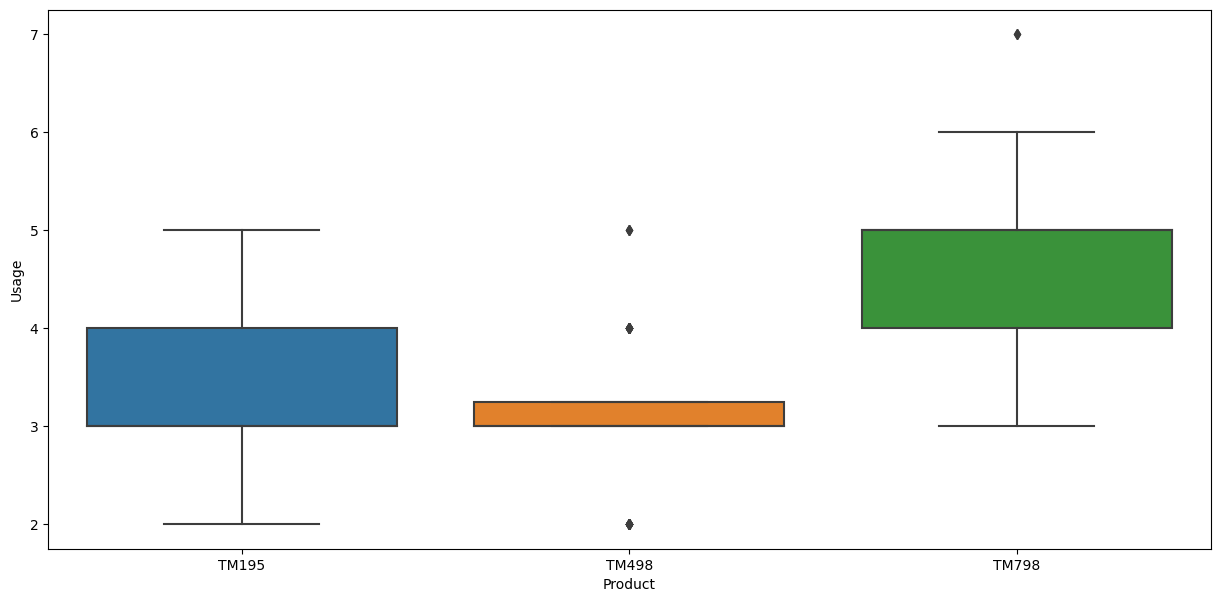

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x ='Product', y ='Usage');

# Product vs Income

<AxesSubplot: xlabel='Product', ylabel='Income'>

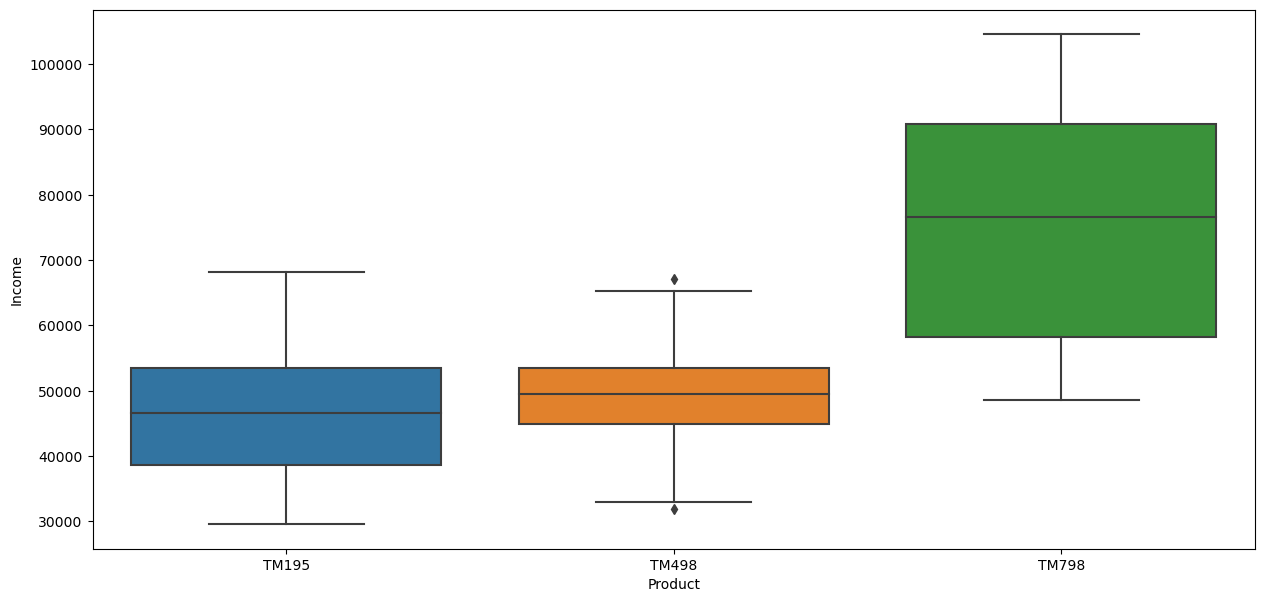

In [36]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='Product', y ='Income')

# Product vs Miles

<AxesSubplot: xlabel='Product', ylabel='Miles'>

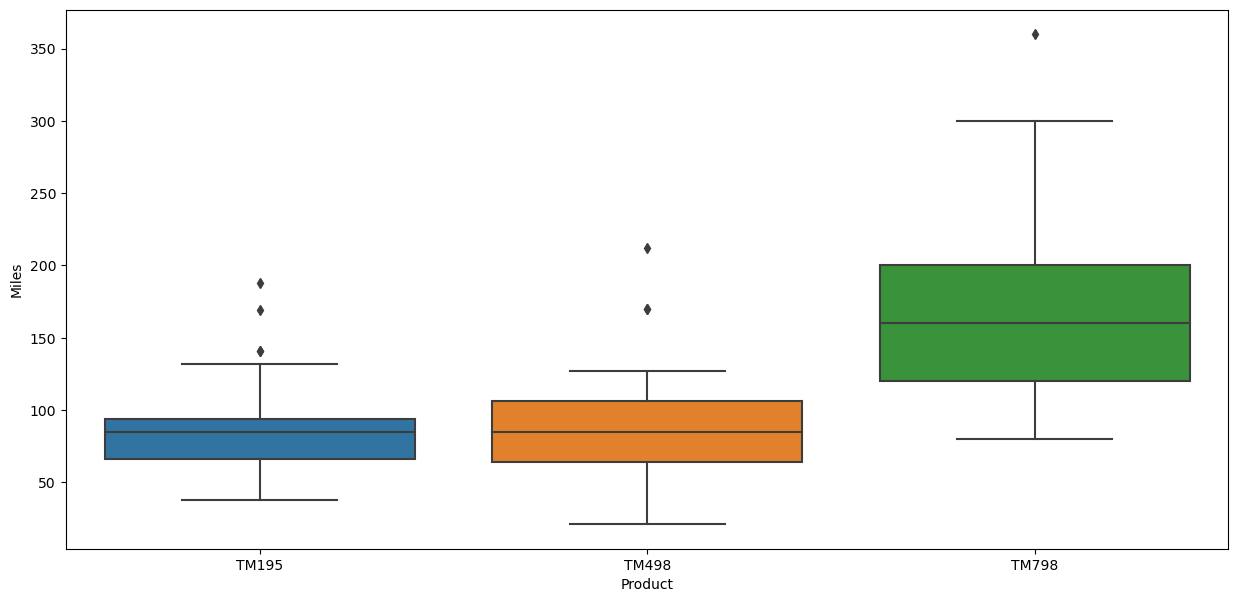

In [38]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='Product', y='Miles')

# Product vs Gender

<AxesSubplot: xlabel='Product', ylabel='count'>

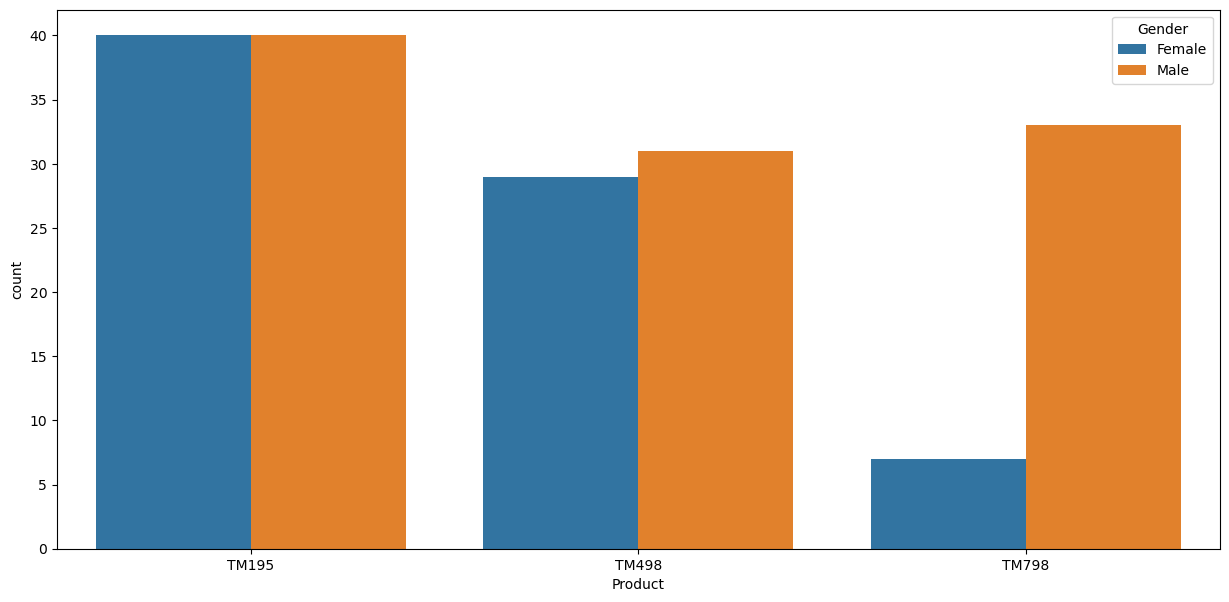

In [40]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x ='Product', hue='Gender')

# Product vs Marital Status

<AxesSubplot: xlabel='Product', ylabel='count'>

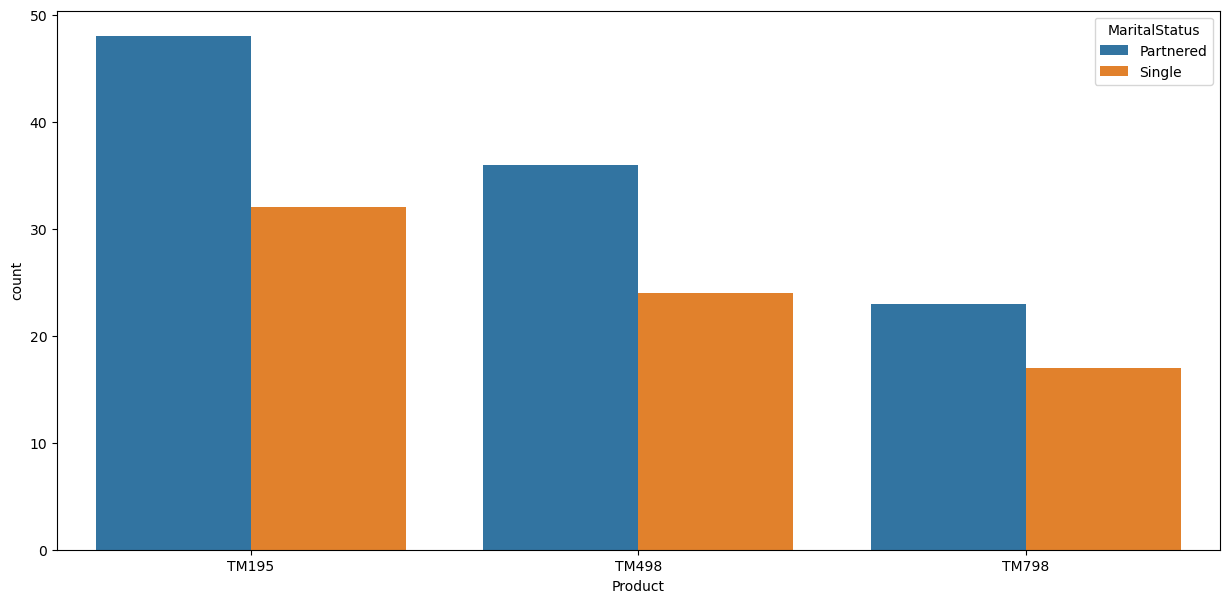

In [41]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Product', hue='MaritalStatus')

# Product vs Fitness

<AxesSubplot: xlabel='Product', ylabel='count'>

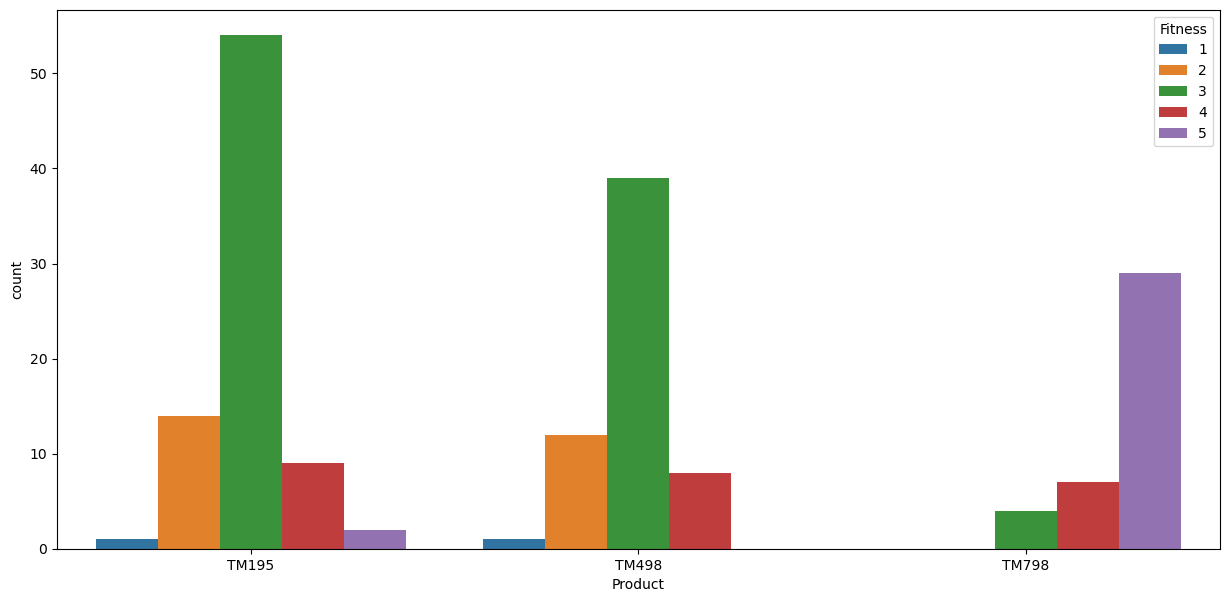

In [42]:
plt.figure(figsize=(15,7))
sns.countplot(data=df, x='Product', hue='Fitness')

In [43]:
df[df['Product'] == 'TM195'].describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,80,80.000000,80,80.000000,80,80.000000,80.00000,80.00000,80.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Female,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,40,NaN,48,NaN,NaN,NaN,NaN
mean,NaN,28.550000,NaN,15.037500,NaN,3.087500,2.96250,46418.02500,82.787500
std,NaN,7.221452,NaN,1.216383,NaN,0.782624,0.66454,9075.78319,28.874102
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.00000,29562.00000,38.000000
25%,NaN,23.000000,NaN,14.000000,NaN,3.000000,3.00000,38658.00000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,46617.00000,85.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,3.00000,53439.00000,94.000000


In [44]:
df[df['Product'] == 'TM498'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,60,60.000000,60,60.000000,60,60.000000,60.00000,60.000000,60.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM498,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,60,NaN,31,NaN,36,NaN,NaN,NaN,NaN
mean,NaN,28.900000,NaN,15.116667,NaN,3.066667,2.90000,48973.650000,87.933333
std,NaN,6.645248,NaN,1.222552,NaN,0.799717,0.62977,8653.989388,33.263135
min,NaN,19.000000,NaN,12.000000,NaN,2.000000,1.00000,31836.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.00000,44911.500000,64.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.00000,49459.500000,85.000000
75%,NaN,33.250000,NaN,16.000000,NaN,3.250000,3.00000,53439.000000,106.000000


In [45]:
df[df['Product'] == 'TM798'].describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,40,40.000000,40,40.000000,40,40.000000,40.000000,40.00000,40.000000
unique,1,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM798,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,40,NaN,33,NaN,23,NaN,NaN,NaN,NaN
mean,NaN,29.100000,NaN,17.325000,NaN,4.775000,4.625000,75441.57500,166.900000
std,NaN,6.971738,NaN,1.639066,NaN,0.946993,0.667467,18505.83672,60.066544
min,NaN,22.000000,NaN,14.000000,NaN,3.000000,3.000000,48556.00000,80.000000
25%,NaN,24.750000,NaN,16.000000,NaN,4.000000,4.000000,58204.75000,120.000000
50%,NaN,27.000000,NaN,18.000000,NaN,5.000000,5.000000,76568.50000,160.000000
75%,NaN,30.250000,NaN,18.000000,NaN,5.000000,5.000000,90886.00000,200.000000


# Customer Segmentation

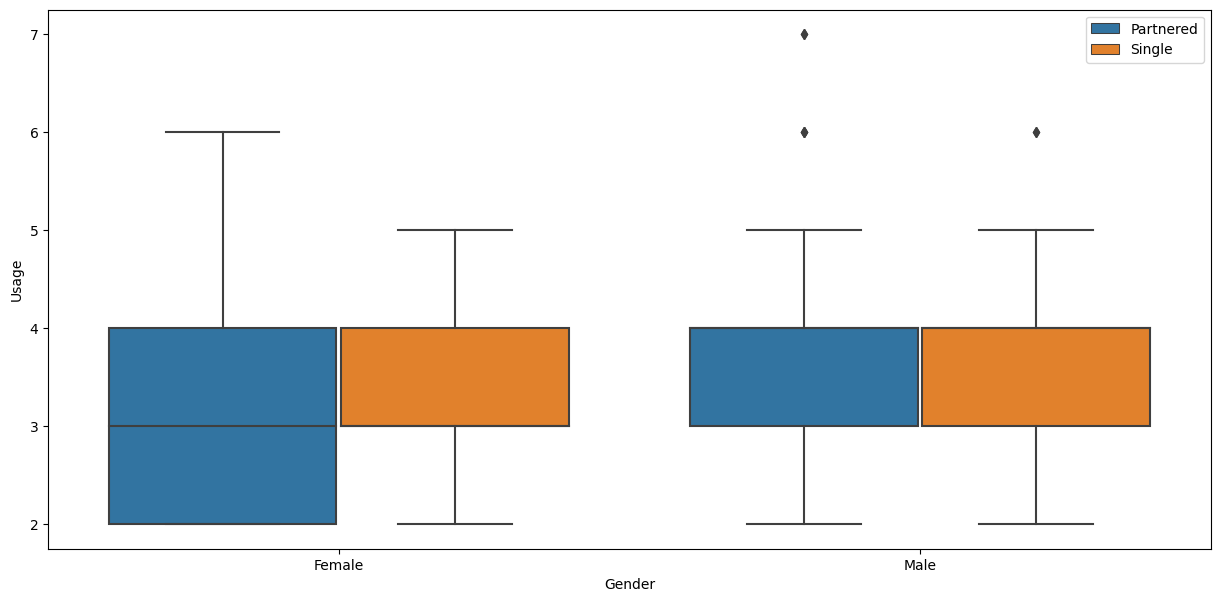

In [49]:
# Usage vs Gender vs Marital Status
plt.figure(figsize=(15,7))
sns.boxplot(data = df, x = df["Gender"], y = df["Usage"],hue=df["MaritalStatus"])
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()